In [18]:
import numpy as np
import pandas as pd
import sympy as sym
import scipy as sp 
import scipy.interpolate
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
x=sym.Symbol('x')
t=sym.Symbol('t')

In [19]:
def f(x):
    return 1+x
def Ker(x,t):
    return -(np.sqrt(x)+np.sqrt(t))
def s(t):
    return (1-t**2)**(1/2)
def P(t):
    return (b-a)/2*t+(b+a)/2
#Exact answer
def g(x):
    return -129/70-141/35*np.sqrt(x)+x

In [20]:
a=0
b=1
n=4

In [21]:
#Fredholm Second Kind by Simpson's 1/3rd Rule
x_1=[]
h=(b-a)/n
for i in range(n+1):
    x_1.append(a+i*h)
K=np.zeros([n+1,n+1])
for i in range(n+1):
    for j in range(n+1):
        if(j==0 or j==n):
            K[i,j]=h/3*Ker(a+i*h,a+j*h)
        elif(j!=0 and j!=n and j%2==1):
            K[i,j]=(4/3)*h*Ker(a+i*h,a+j*h)
        else:
            K[i,j]=(2/3)*h*Ker(a+i*h,a+j*h)
        if(i==j):
            K[i,j]=1+K[i,j]
F=np.zeros(n+1)
for i in range(n+1):
    F[i]=f(a+i*h)
phi=np.linalg.solve(K,F)
r_phi=np.round_(phi,decimals=4)

In [22]:
#Exact solution
G=np.zeros(n+1)
for i in range(n+1):
    G[i]=g(x_1[i])
r_G=np.round(G,decimals=4)

In [23]:
#Using Chebyshev Method
w=np.pi/(n+1)
Ker_mat=np.zeros([n+1,n+1])
x_k=[]
PP=np.zeros(n+1)
for k in range(n+1):
    xx=np.cos((2*k+1)*np.pi/(2*n+2))
    x_k.append(xx)
for i in range(n+1):
    for j in range(n+1):
        Ker_mat[i,j]=w*Ker(P(x_k[i]),P(x_k[j]))*s(x_k[j])*(b-a)/2
        PP[i]=P(x_k[i])
        if(i==j):
            Ker_mat[i,j]=1+Ker_mat[i,j]
F=np.zeros(n+1)
for i in range(n+1):
    F[i]=f(P(x_k[i]))
phi2=np.linalg.solve(Ker_mat,F)

In [24]:
inter_f=sp.interpolate.interp1d(x_1,phi,kind='quadratic')
t_new=np.arange(a,b+0.00001,0.0001)
f_quad=inter_f(t_new)
G_new=g(t_new)

In [26]:
pol = np.polyfit(PP,phi2,len(PP)-1)
pol1 = np.polyfit(x_1,phi,len(x_1)-1)
PP1 = np.linspace(min(PP),max(PP))
nn=4
x1=np.zeros(nn+1)
xx=np.zeros(nn+1)
hh=(b-a)/nn
for i in range(nn+1):
    xx[i]=a+i*hh
phi_exact=g(xx)
phi_1=np.polyval(pol1,xx)
phi_2=np.polyval(pol,xx)

In [27]:
df=np.round(pd.DataFrame({'x':xx,'$\phi_e(x)$':phi_exact,'$\phi_s(x)$':phi_1,'$\phi_c(x)$':phi_2,'$E_s=|\phi_e(x)-\phi_s(x)|$':abs(phi_1-phi_exact),'$E_c=|\phi_e(x)-\phi_c(x)|$':abs(phi_2-phi_exact)}).T,4)
df.to_excel(excel_writer="C:/Users/Subham/Documents/Internship/3.xlsx")

In [28]:
pd.read_excel('3.xlsx')

,Unnamed: 0,0,1,2,3,4
0,x,0.0000,0.2500,0.5000,0.7500,1.0000
1,$\phi_e(x)$,-1.8429,-3.6071,-4.1915,-4.5817,-4.8714
2,$\phi_s(x)$,-1.9135,-3.7212,-4.3235,-4.7275,-5.0289
3,$\phi_c(x)$,-2.1347,-3.4486,-3.9880,-4.3492,-4.6163
4,$E_s=|\phi_e(x)-\phi_s(x)|$,0.0707,0.1140,0.1320,0.1458,0.1574
5,$E_c=|\phi_e(x)-\phi_c(x)|$,0.2919,0.1586,0.2035,0.2325,0.2552


In [29]:
n_=100
x1=np.zeros(n_+1)
xx_=np.zeros(n_+1)
hh=(b-a)/n_
for i in range(n_+1):
    xx_[i]=a+i*hh
phi_exact_=g(xx)
phi_1_=np.polyval(pol1,xx_)
phi_2_=np.polyval(pol,xx_)

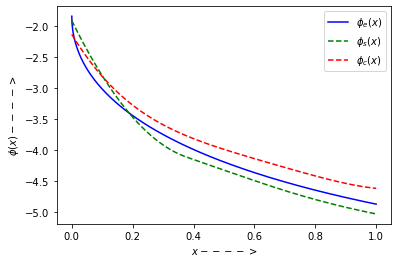

In [30]:
plt.plot(t_new,G_new,'b-',t_new,f_quad,'g--',xx_,phi_2_,'r--')
plt.xlabel("$x ---->$")
plt.ylabel("$\phi(x) ---->$")
colors = ['blue', 'green', 'red']
plt.legend(['$\phi_e(x)$','$\phi_s(x)$','$\phi_c(x)$'])
plt.savefig("3.jpg", format="jpg", dpi=300)
plt.show()